# **Maximum Likelihood Fitting**

In the last lab, you learn't about the Exploratory Data Analysis (EDA) which have a lot of importance before performing any task on the data. Afterwards, you did linear regression using the Ordinary Least Squares (OLS) method.

Remember when we considered ordinary least squares regression (OLS) we came up with a way of “scoring” how well the line fits the data by summing up the squared residuals. This gave us a “number” of how good a line we had found and then we searched around in the parameters to find the line which minimized the best fit.

We are going to do a similar thing with the log odds regression but instead of computing residuals we will instead convert the predicted values of the regression line into probabilities and compute the “likelihood” of the data under those probabilities.
Let’s start by reloading the hypothetical dataset we considered from the start of the [dataset](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset)



# **Lab Assignment:** Maximum Likelihood Estimation and Gradient Descent Optimization
# **Intuition of computing the likelihood**
There are more formal approaches to defining maximum likelihood estimation but lets just use intuition here. We can think of a binary prediction as predicting the outcome of a coin toss. If we have a fair coin (i.e., one that has equal probability of heads and tails) then the probability of say “heads” is 0.5 on a single flip. We can consider this probability the likelihood of getting a heads.
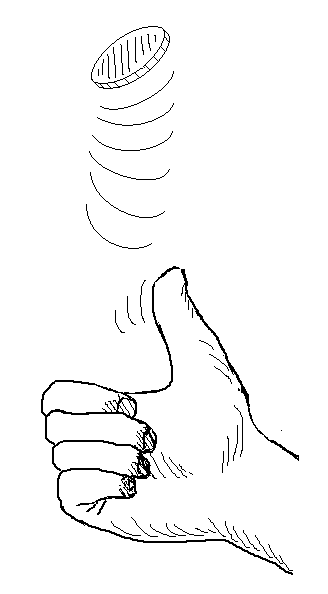


What is the likelihood of getting a particular event or data d.


1. For instance the probability of getting a single coin flip to turn up heads could written?
2. How about if the coin flip came up tails? Then we would have?

So which the probability of a binary event like heads/tails is a function of the outcome and the probability we assigned to that outcome.


We want to move the parameters of our regression line so that we maximize the likelihood of the data. Meaning, we want to try to assign higher probabilities to customers who churned and lower probabilities to customers who didn't churn. Our main limitation here is that we are using the sigmoid function, and so generally, we have this kind of S-shaped curve, and we want to adjust it to match the data.
In an ideal case, we could assign pred_p = 1.0 to customers who churned and pred_p = 0.0 to customers who didn't churn, based on their characteristics, such as usage patterns, billing amount, and customer satisfaction. However, in our dataset, there doesn't appear to be a clear threshold for churning, so all we can do is see that churn probabilities change with different characteristics, but we don't know exactly how to fit this.
So, to summarize where we are so far, we understand that the logistic regression curve will assign a "probability" of churning to each customer in our dataset. We want to try "wiggling" the parameters of the regression around so that we assign high probabilities to customers who actually churned and low probabilities to customers who didn't churn. Our hands are tied in one way, which is that since we are using a logistic regression model, we generally can only adjust this S-shaped probability curve.

# **Fitting all the data with the joint likelihood**
However, there are two remaining pieces to the puzzle. The first is how we assess all the customers at once. The model predicts a log-odds for each customer in our dataset, which we convert to a probability. But then we want to do this for all the customers in our dataset together. In other words, we aren’t assessing the probability of one customer churning; we are doing it for all the customers in our dataset.
Luckily, the probability of a bunch of independent data is simply the multiplication of all the probabilities. You can think of it as: "What is the probability of Customer 1 churning AND Customer 2 not churning AND Customer 3 churning, AND so on?" By multiplying these probabilities together, we can get an overall likelihood of our model given the data.


## **Objective:**
 To understand and implement Maximum Likelihood Estimation (MLE) to find a probability distribution that fits the given data and optimize the likelihood function using the Gradient Descent **(Batch, Mini-batch and Stochastic)** technique.

# Task 1: **EDA**

Do the necessary EDA carefully this time. The dataset already consists of the training portion and testing portion in two different files. Hence, no data splitting is required here.

Treat it as a classification problem. The last column being the dependent variable. For this Task 1, do the exhaustive Exploratory Data Analysis (EDA) with all possible visualization as done in the Lab 1.

In [1]:
# necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [79]:
#necessary matrices and functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

In [3]:
# load training and testing dataset
df_train=pd.read_csv('customer_churn_dataset-training-master.csv')
df_test=pd.read_csv('customer_churn_dataset-testing-master.csv')

In [4]:
# display first 5 rows of training data
df_train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
# checking the shape of training data
df_train.shape

(440833, 12)

In [6]:
# display first 5 rows of testing data
df_test.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [7]:
# checking shape of test dataset
df_test.shape

(64374, 12)

In [85]:
# data types of each column
df_train.dtypes

,0
Age,float64
Tenure,float64
Usage Frequency,float64
Support Calls,float64
Payment Delay,float64
Total Spend,float64
Last Interaction,float64
Gender_Male,int64
Subscription Type_Premium,int64
Subscription Type_Standard,int64


In [9]:
# dropping CustomerID column from both training and testing dataset
df_train.drop('CustomerID',axis=1,inplace=True)
df_test.drop('CustomerID',axis=1,inplace=True)

In [10]:
# statistical summary of numerical columns in the training dataset
df_train.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [11]:
# statistical summary of categorical columns in the training dataset
df_train.describe(include='object')

,Gender,Subscription Type,Contract Length
count,440832,440832,440832
unique,2,3,3
top,Male,Standard,Annual
freq,250252,149128,177198


In [12]:
# Check for missing values in each column of the training dataset
df_train.isnull().sum()

,0
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1
Last Interaction,1


In [13]:
# finding empty row
df_train[df_train['Age'].isna()]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# dropping empty row
df_train.drop(199295,axis=0,inplace=True)

In [15]:
# again checking if there is still nan values
df_train.isnull().sum()

,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0
Last Interaction,0


In [16]:
df_train.reset_index(drop=True,inplace=True)

In [17]:
df_train.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [18]:
# Check for missing values in each column of the testing dataset
df_test.isnull().sum()

,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0
Last Interaction,0


<Figure size 1500x1500 with 0 Axes>

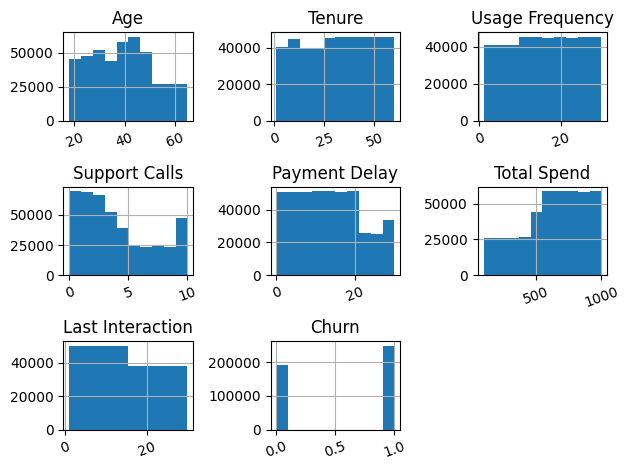

In [19]:
# set the figure size
plt.figure(figsize=(15,15))

# plot histograms for all numerical columns in the training dataset
df_train.hist(xrot=20)  # rotate x-axis labels by 20 degrees

# adjust layout to prevent overlapping of plots
plt.tight_layout()

# display the plots
plt.show()


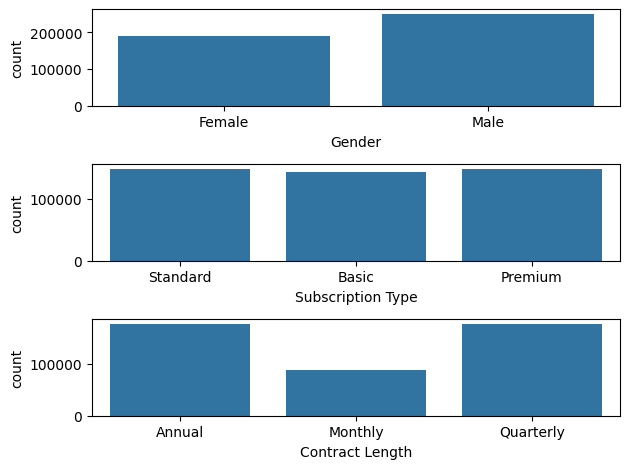

In [20]:
# categorical columns
categorical_columns = df_train.select_dtypes(include='object').columns

# ploting count plots for each categorical column
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(data=df_train, x=col)

# adjust layout
plt.tight_layout()

# show plots
plt.show()

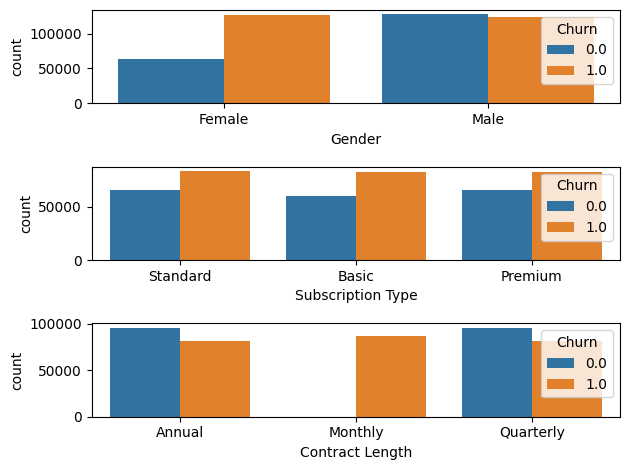

In [21]:
# plotting count plots for each categorical column with churn as hue
for i,col in enumerate(categorical_columns,1):
  plt.subplot(len(categorical_columns),1,i)
  sns.countplot(data=df_train,x=col,hue='Churn')

plt.tight_layout()
plt.show()

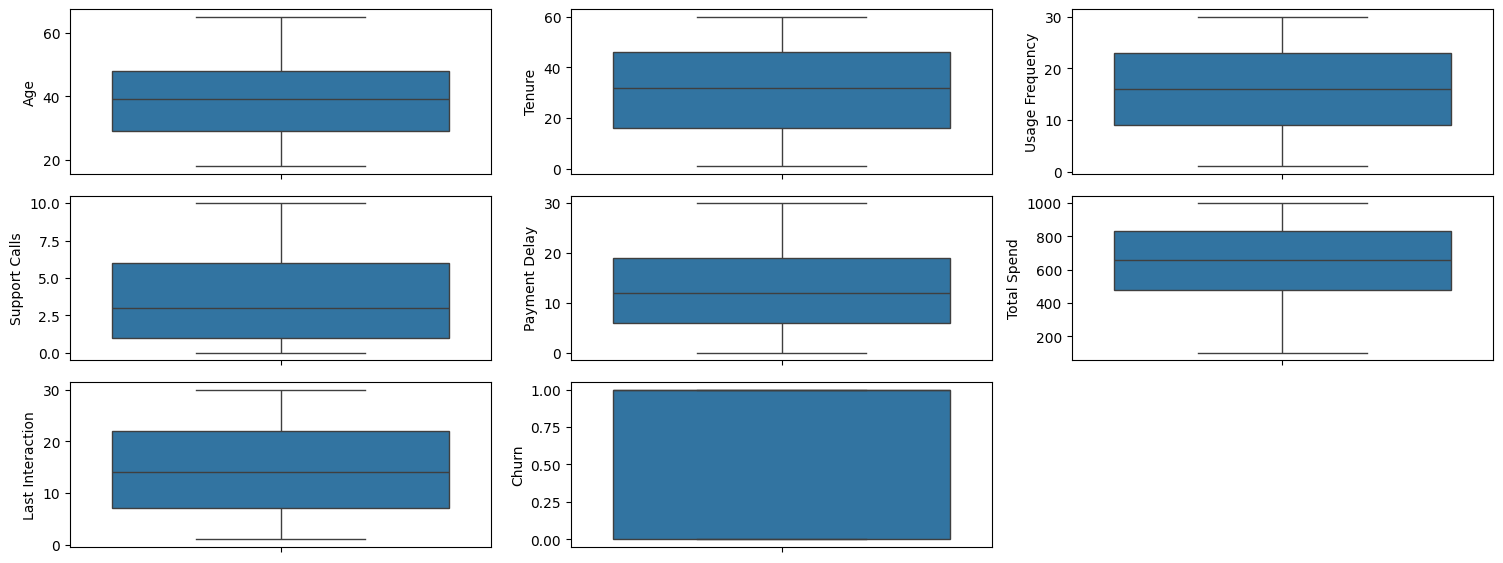

In [22]:
plt.figure(figsize=(15,15))
# numeric columns
numeric_columns=df_train.select_dtypes(exclude='object').columns

# plotting boxplots for each numerical column
for i,col in enumerate(numeric_columns,1):
  plt.subplot(len(numeric_columns),3,i)
  sns.boxplot(data=df_train,y=col)

plt.tight_layout()
plt.show()

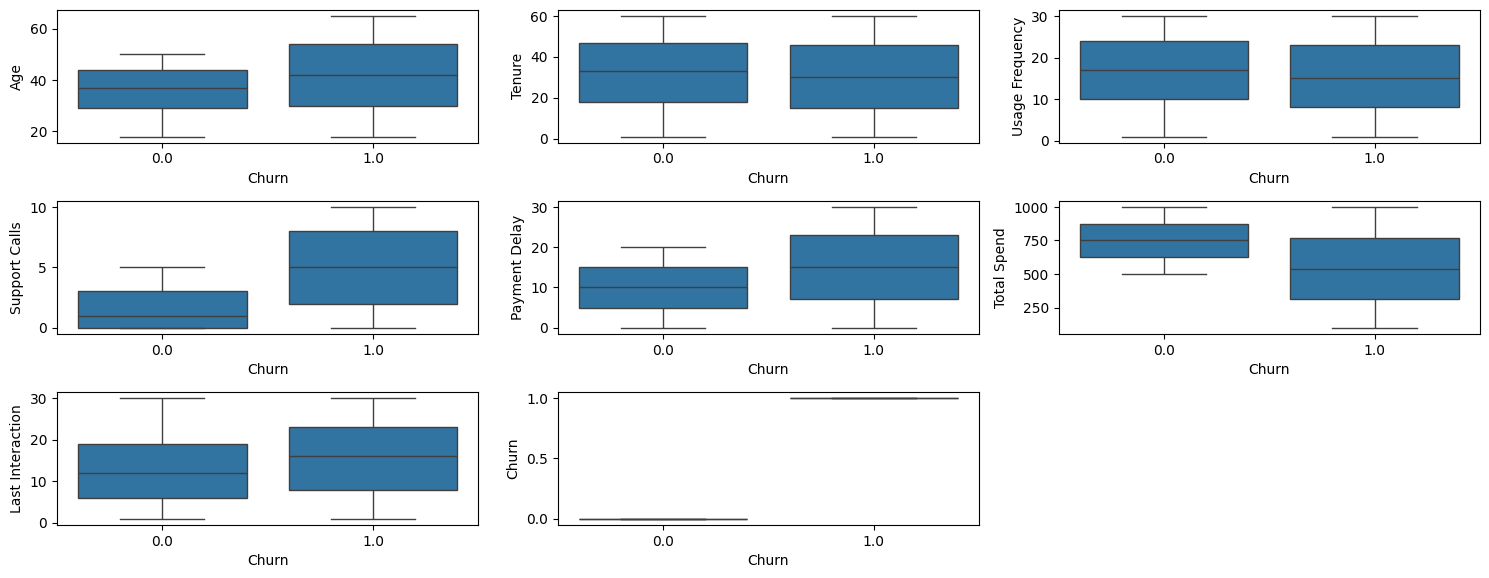

In [23]:
plt.figure(figsize=(15,15))

# plotting boxplots for each numerical column with churn as x-axis
for i,col in enumerate(numeric_columns,1):
  plt.subplot(len(numeric_columns),3,i)
  sns.boxplot(data=df_train,y=col,x='Churn')

plt.tight_layout()
plt.show()

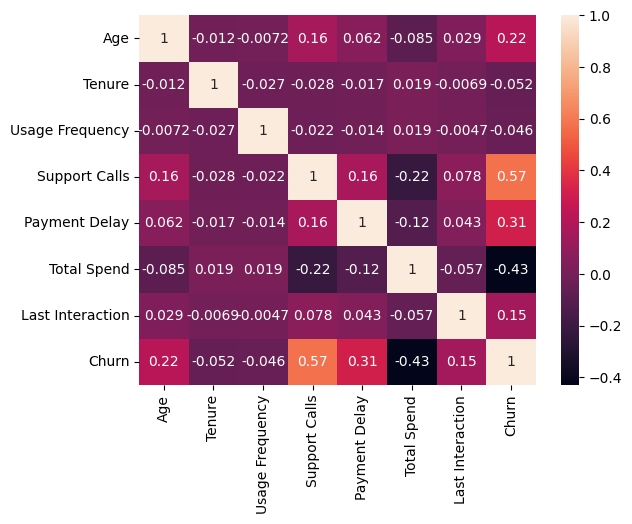

In [24]:
numerical_features=df_train.select_dtypes(include=np.number)
# plotting heatmap of correlation matrix for testing data
sns.heatmap(numerical_features.corr(),annot=True)
plt.show()

In [25]:
# create dataframe to store vif values
vif = pd.DataFrame()

# store feature names excluding churn
vif['features'] = numerical_features.drop('Churn', axis=1).columns

# calculate vif for each feature
vif['vif'] = [variance_inflation_factor(numerical_features.drop('Churn', axis=1).values, i) for i in range(numerical_features.drop('Churn', axis=1).shape[1])]

# display vif values
vif

,Features,VIF
0,Age,8.043743
1,Tenure,3.823644
2,Usage Frequency,3.917277
3,Support Calls,2.522120
4,Payment Delay,3.333153
5,Total Spend,5.728235
6,Last Interaction,3.557626


In [26]:
categorical_features=df_train.select_dtypes(include='object')
# converting categorical features to dummy variables
dummy_df=pd.get_dummies(categorical_features,drop_first=True,dtype=int)
dummy_df.head()

,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,0,0,1
3,1,0,1,1,0
4,1,0,0,1,0


In [27]:
# initialize min-max scaler
scaler = MinMaxScaler()

# scale numerical features excluding churn
numerical_features_scaled = pd.DataFrame(scaler.fit_transform(numerical_features.drop('Churn', axis=1)),columns=numerical_features.drop('Churn', axis=1).columns)
numerical_features_scaled.head()


,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
0,0.255319,0.644068,0.448276,0.5,0.600000,0.924444,0.551724
1,1.000000,0.813559,0.000000,1.0,0.266667,0.507778,0.172414
2,0.787234,0.220339,0.103448,0.6,0.600000,0.094444,0.068966
3,0.851064,0.627119,0.689655,0.7,0.233333,0.328889,0.965517
4,0.106383,0.525424,0.655172,0.5,0.266667,0.574444,0.655172


In [28]:
# combine scaled numerical features and dummy variables
df_train = pd.concat([numerical_features_scaled, dummy_df], axis=1)

# add churn column back to the dataset
df_train['Churn'] = numerical_features['Churn']
df_train.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly,Churn
0,0.255319,0.644068,0.448276,0.5,0.600000,0.924444,0.551724,0,0,1,0,0,1.0
1,1.000000,0.813559,0.000000,1.0,0.266667,0.507778,0.172414,0,0,0,1,0,1.0
2,0.787234,0.220339,0.103448,0.6,0.600000,0.094444,0.068966,0,0,0,0,1,1.0
3,0.851064,0.627119,0.689655,0.7,0.233333,0.328889,0.965517,1,0,1,1,0,1.0
4,0.106383,0.525424,0.655172,0.5,0.266667,0.574444,0.655172,1,0,0,1,0,1.0


<Figure size 1500x1500 with 0 Axes>

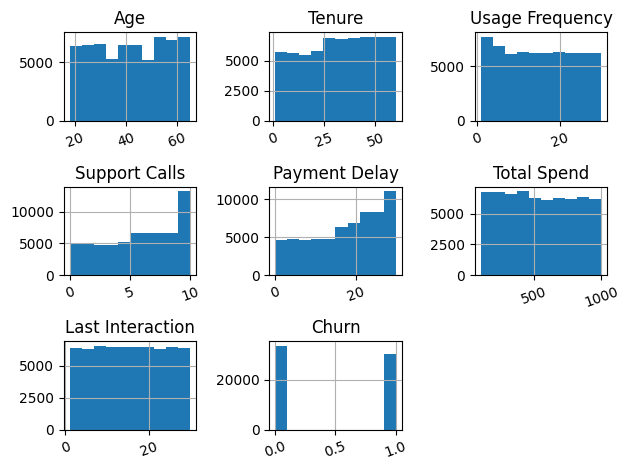

In [29]:
plt.figure(figsize=(15,15))
# plot histograms for all numerical columns in the testing dataset
df_test.hist(xrot=20)
plt.tight_layout()
plt.show()

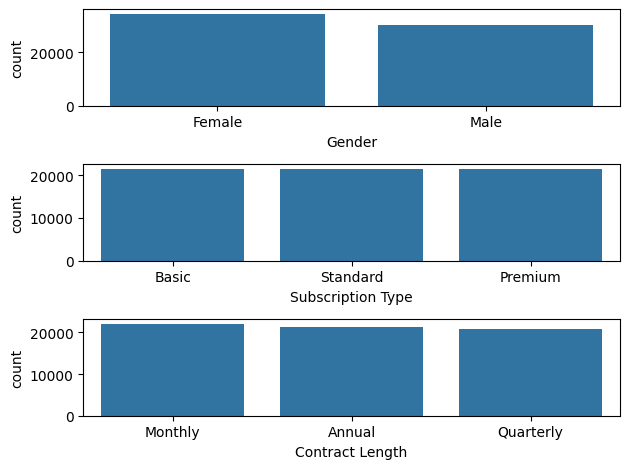

In [30]:
# categorical columns in test dataset
categorical_columns_test=df_test.select_dtypes(include='object').columns

# plotting count plots for each categorical column in test dataset
for i,col in enumerate(categorical_columns_test,1):
  plt.subplot(len(categorical_columns_test),1,i)
  sns.countplot(data=df_test,x=col)

plt.tight_layout()
plt.show()

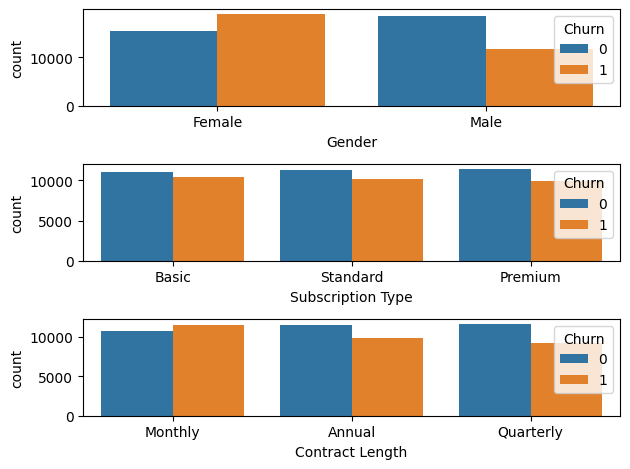

In [31]:
# plotting count plots for each categorical column in test dataset with churn as hue
for i,col in enumerate(categorical_columns_test,1):
  plt.subplot(len(categorical_columns_test),1,i)
  sns.countplot(data=df_test,x=col,hue='Churn')

plt.tight_layout()
plt.show()

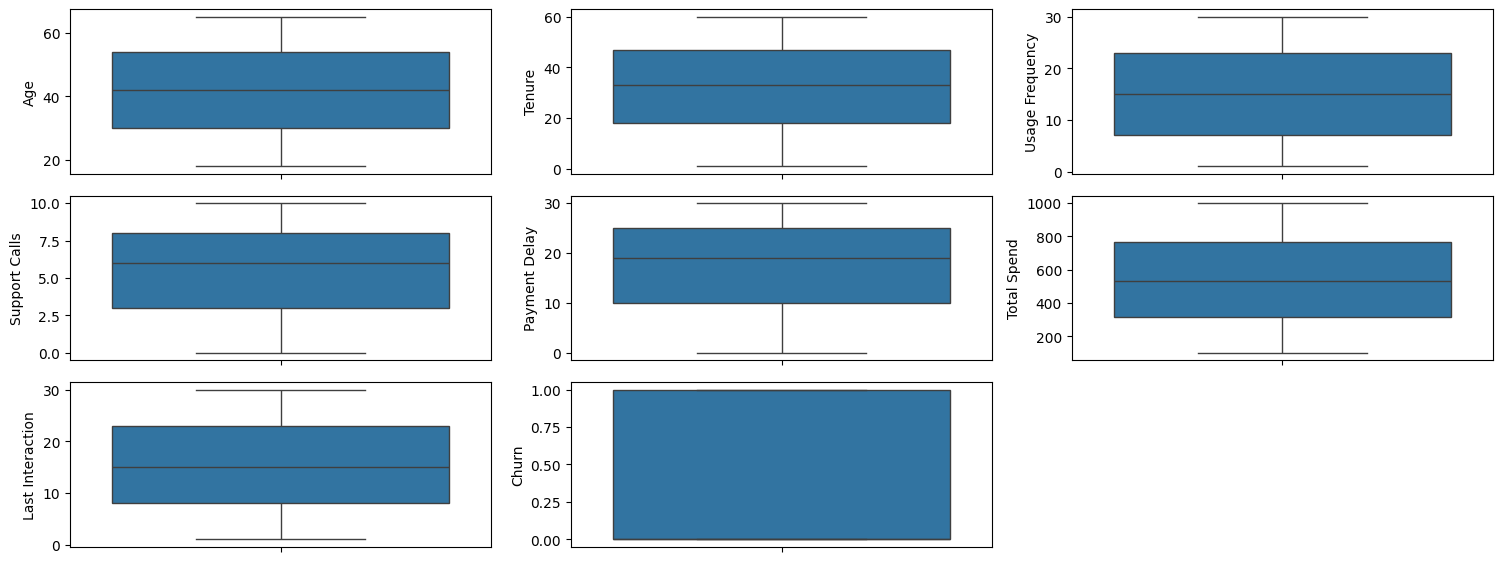

In [32]:
plt.figure(figsize=(15,15))
# numerical columns in test dataset
numeric_columns_test = df_test.select_dtypes(exclude='object').columns

# plotting boxplots for each numerical column in test dataset
for i, col in enumerate(numeric_columns_test, 1):
    plt.subplot(len(numeric_columns_test), 3, i)
    sns.boxplot(data=df_test, y=col)


plt.tight_layout()
plt.show()

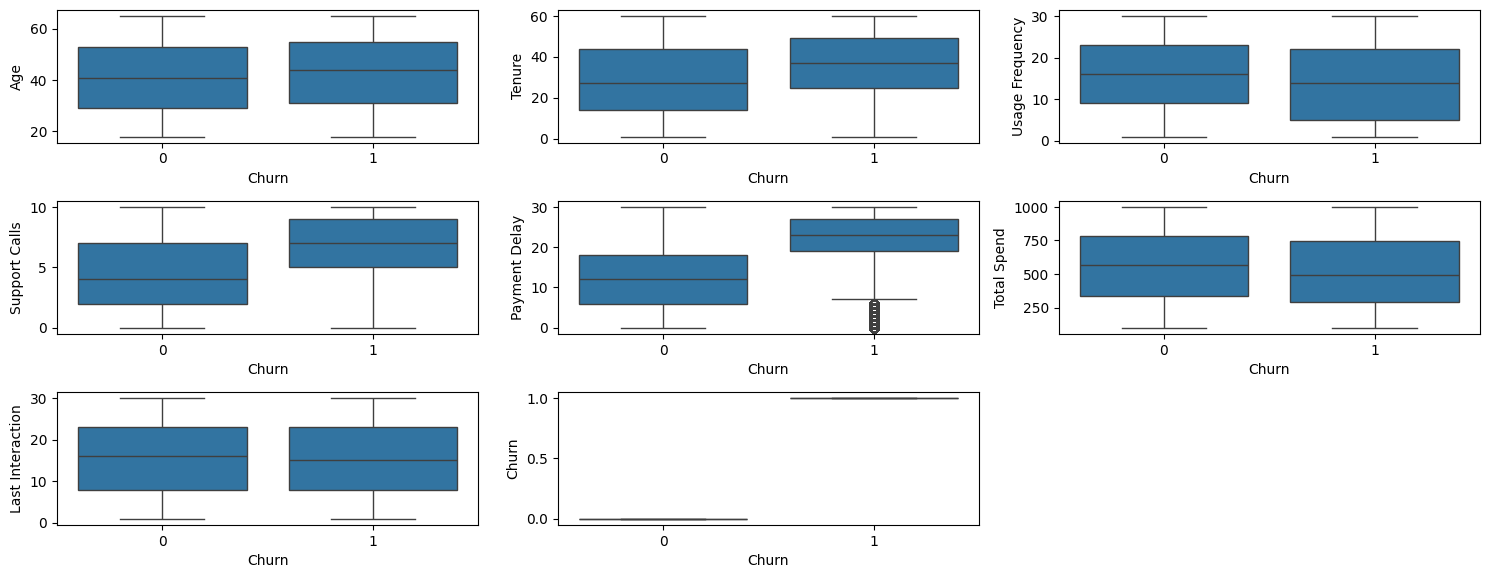

In [33]:
plt.figure(figsize=(15,15))

# plotting boxplot for each numeric column with churn at x-axis
for i,col in enumerate(numeric_columns_test,1):
  plt.subplot(len(numeric_columns_test),3,i)
  sns.boxplot(data=df_test,y=col,x='Churn')

plt.tight_layout()
plt.show()

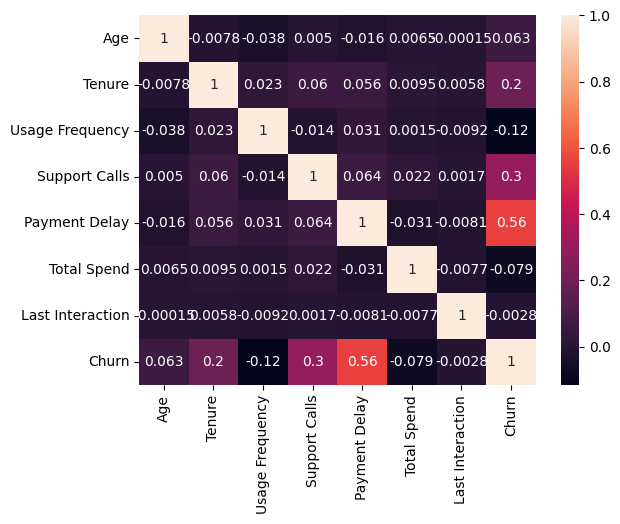

In [34]:
numerical_features_test=df_test.select_dtypes(include=np.number)
# plotting heatmap of correlation matrix of testing dataset
sns.heatmap(numerical_features_test.corr(),annot=True)
plt.show()

In [35]:
# scaling numerical features in test dataset excluding churn
numerical_features_test_scaled=pd.DataFrame((scaler.fit_transform(numerical_features_test.drop('Churn',axis=1))),columns=numerical_features_test.drop('Churn',axis=1).columns)
numerical_features_test_scaled.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
0,0.085106,0.406780,0.448276,0.4,0.900000,0.553333,0.275862
1,0.489362,0.457627,0.931034,0.7,0.433333,0.537778,0.655172
2,0.617021,0.440678,0.310345,0.2,0.966667,0.730000,0.689655
3,0.361702,0.135593,0.379310,0.5,0.566667,0.146667,0.586207
4,0.744681,0.966102,0.793103,0.9,0.066667,0.481111,0.586207


In [36]:
categorical_test_features=df_test.select_dtypes(include='object')
# converting categorical features in test dataset to dummy variables
dummy_test_df = pd.get_dummies(categorical_test_features, drop_first=True, dtype=int)

# combine scaled numerical features and dummy variables
df_test = pd.concat([numerical_features_test_scaled, dummy_test_df], axis=1)

# add churn column back to the test dataset
df_test['Churn'] = numerical_features_test['Churn']

df_test.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly,Churn
0,0.085106,0.406780,0.448276,0.4,0.900000,0.553333,0.275862,0,0,0,1,0,1
1,0.489362,0.457627,0.931034,0.7,0.433333,0.537778,0.655172,0,0,1,1,0,0
2,0.617021,0.440678,0.310345,0.2,0.966667,0.730000,0.689655,1,1,0,0,0,0
3,0.361702,0.135593,0.379310,0.5,0.566667,0.146667,0.586207,1,1,0,0,1,0
4,0.744681,0.966102,0.793103,0.9,0.066667,0.481111,0.586207,0,0,1,0,0,0


# Task 2: **Cost Function**

Figure out the cost function for this problem, whose Log Likelihood you would be maximizing. All the training samples would be considered in this.

( Hint: Dependent Variable can be considered as a normally distributed if enough samples are there. But an important thing is that this Dependent variable is also dependent on other independent variables. Hence, take that in consideration while formulating the cost function.)

Explicity write final function in your report for this Task.

In [37]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [38]:
#log likelihood function
def log_likelihood(x,y,theta):
  z=np.dot(x,theta)
  y_pred=sigmoid(z)
  return np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))

In [39]:
#loss function
def compute_loss(x,y,theta):
  z=np.dot(x,theta)
  y_pred=sigmoid(z)
  loss=-np.mean(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
  return loss

In [86]:
#gradient descent
def compute_gradient(x,y,theta):
  z=np.dot(x,theta)
  y_pred=sigmoid(z)
  gradient=np.dot(x.T,(y_pred-y))/y.shape[0]
  return gradient

# Task 3: **Gradient Descent Algorithm**
Implement that cost function in your gradient descent algorithm. This time also repeat it for all 3 variants **(Batch, Mini-batch, and Stochastic)**.
Use sufficient number of epochs and a good learning rate as needed for the training.

Hence, you would have 3 versions of your Probability Distribution Function or you can say 3 Models with different *θ*.

In [41]:
# stochastic gradient descent
def sgd(x, y, alpha=0.01, epochs=100):
    n, m = x.shape
    theta = np.zeros(m)
    log_likelihood_history = []

    for epoch in range(epochs):
        # select a random sample
        random_index = np.random.randint(n)
        x_i = x.iloc[random_index, :].values.reshape(1, -1)
        y_i = y.iloc[random_index]

        # compute prediction
        y_pred = sigmoid(np.dot(x_i, theta))

        # compute gradient
        gradient = np.dot(x_i.T, (y_pred - y_i))

        # update parameters
        theta = theta - alpha * gradient

        # store log-likelihood
        log_likelihood_history.append(log_likelihood(x, y, theta))

    return theta, log_likelihood_history

In [42]:
# gradient descent
def gd(x, y, alpha=0.01, epochs=100):
    n, m = x.shape
    theta = np.zeros(m)
    log_likelihood_history = []

    for i in range(epochs):
        # compute gradient
        gradient = compute_gradient(x, y, theta)

        # update parameters
        theta -= alpha * gradient

        # store log-likelihood
        log_likelihood_history.append(log_likelihood(x, y, theta))

    return theta, log_likelihood_history

In [49]:
# batch gradient descent
def bgd(x, y, alpha=0.01, epochs=100, batch_size=32):
    n, m = x.shape
    theta = np.zeros(m)
    log_likelihood_history = []

    for epoch in range(epochs):
        # select a random batch
        i = np.random.randint(0, n - batch_size + 1)
        x_batch = x[i:i + batch_size]
        y_batch = y[i:i + batch_size]

        # compute gradient
        gradient = compute_gradient(x_batch, y_batch, theta)

        # update parameters
        theta -= alpha * gradient

        # store log-likelihood
        log_likelihood_history.append(log_likelihood(x, y, theta))

    return theta, log_likelihood_history


In [44]:
# split training data into features and target
x_train=df_train.drop('Churn',axis=1)
y_train=df_train['Churn']

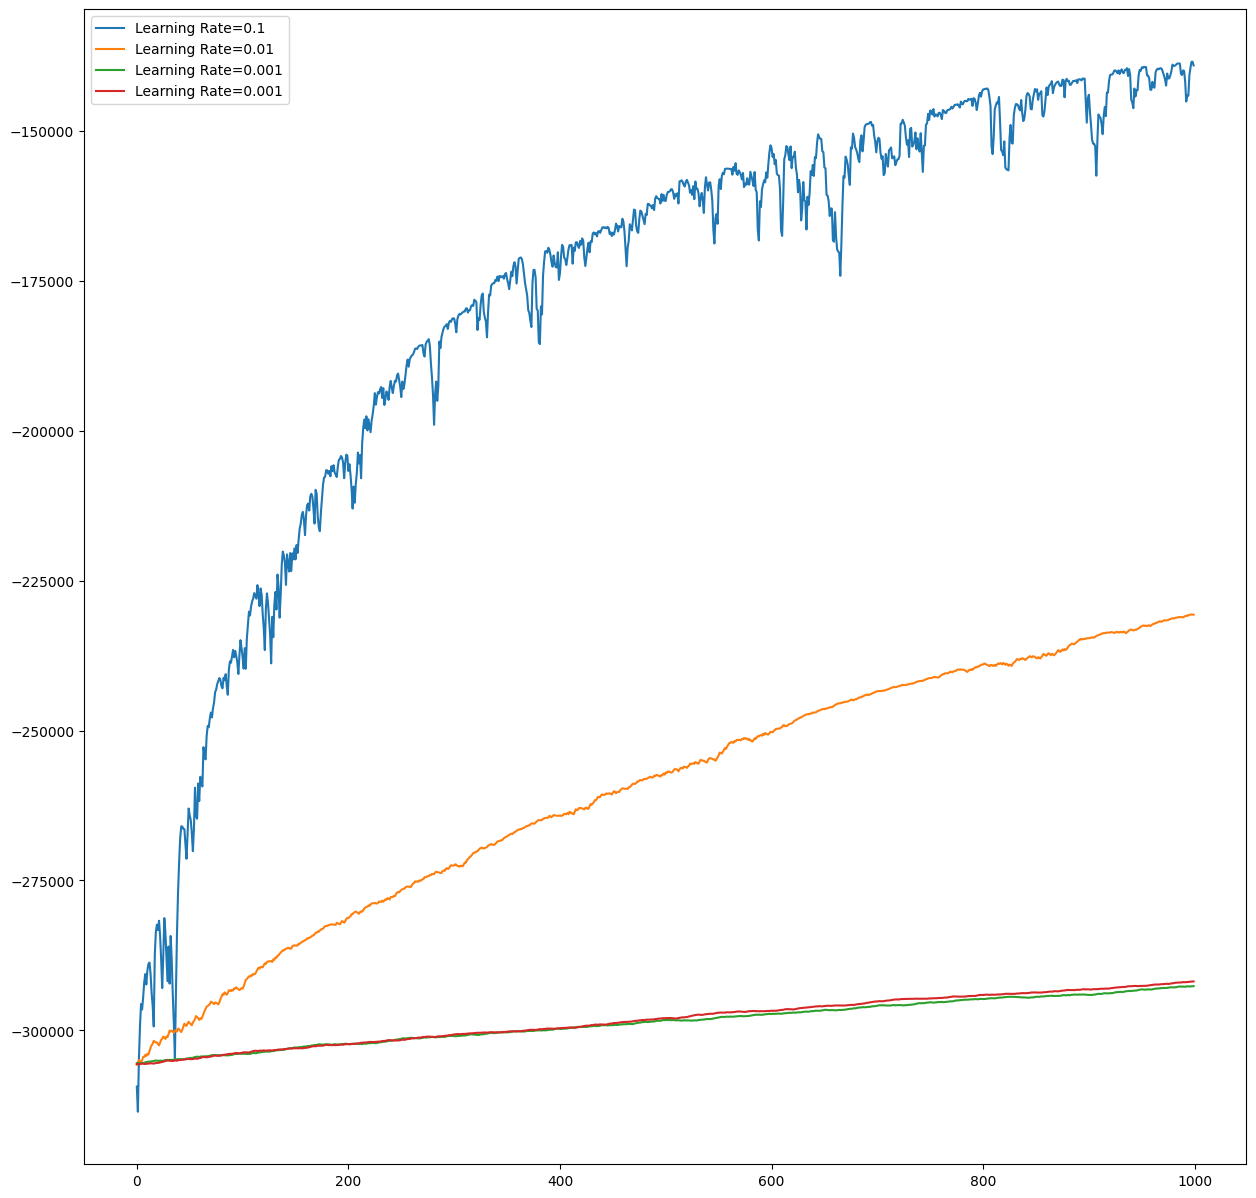

In [45]:
# different learning rates and number of epoch
learning_rate=[0.1,0.01,0.001,0.001]
epochs=1000

plt.figure(figsize=(15,15))

# train model for each learning rate and plot log-likelihood with stchocastic gradient descent
for i in learning_rate:
  _,log_likelihood_history=sgd(x_train,y_train,i,epochs)
  plt.plot(log_likelihood_history,label=f'Learning Rate={i}')
plt.legend()
plt.show()

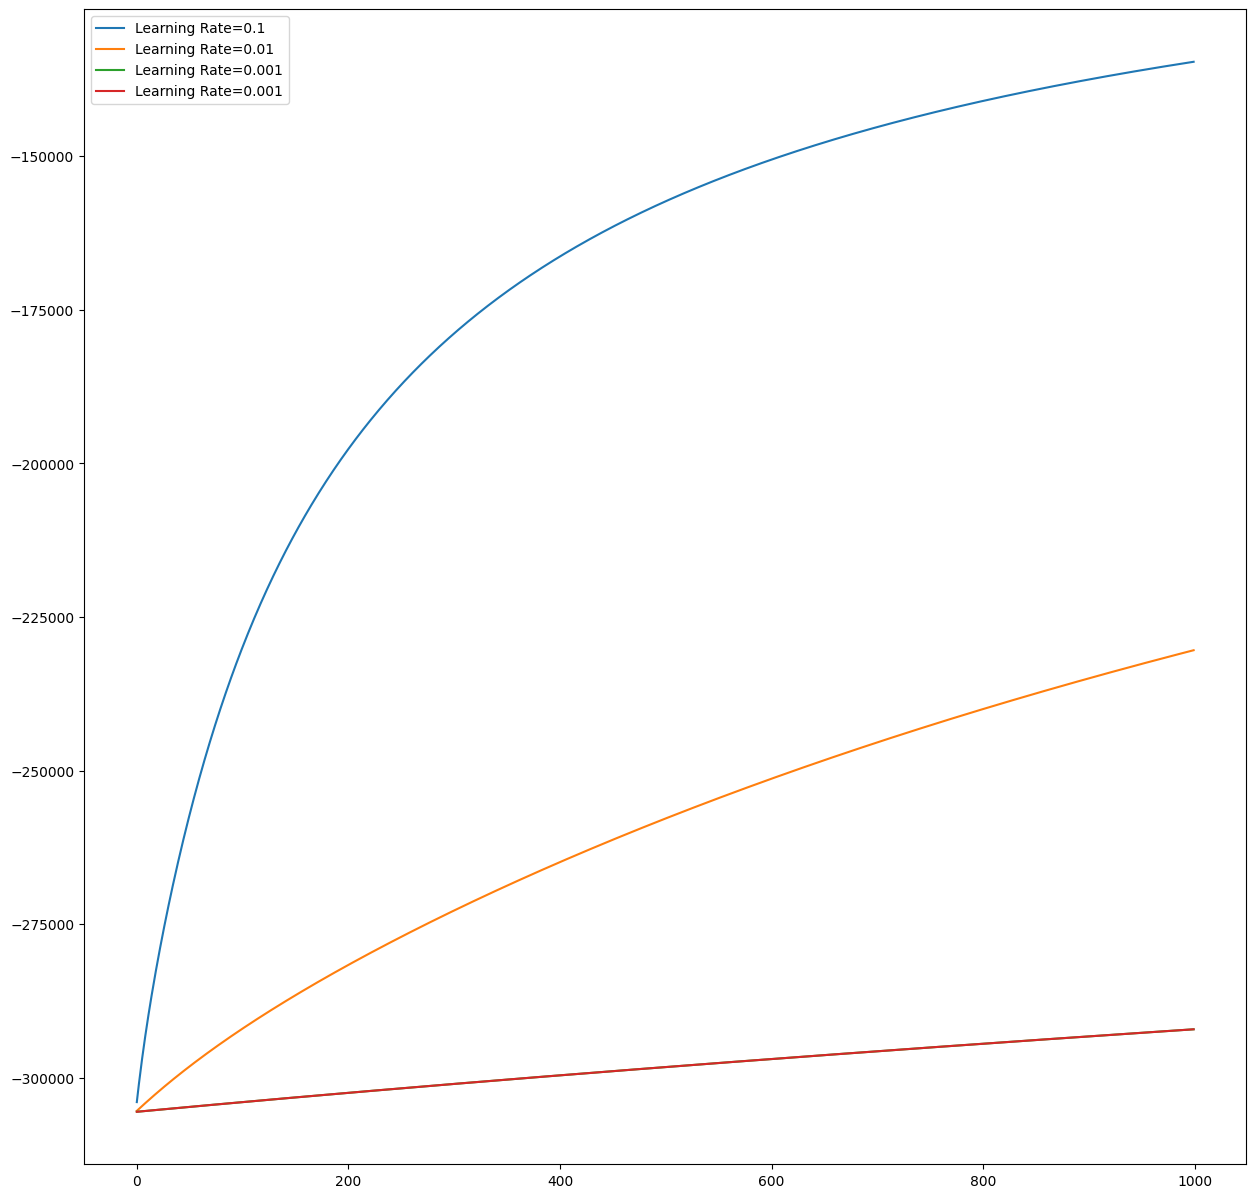

In [46]:
learning_rate=[0.1,0.01,0.001,0.001]
epochs=1000

plt.figure(figsize=(15,15))

# train model for each learning rate and plot log-likelihood with full batch gradient descent
for i in learning_rate:
  _,log_likelihood_history=gd(x_train,y_train,i,epochs)
  plt.plot(log_likelihood_history,label=f'Learning Rate={i}')
plt.legend()
plt.show()

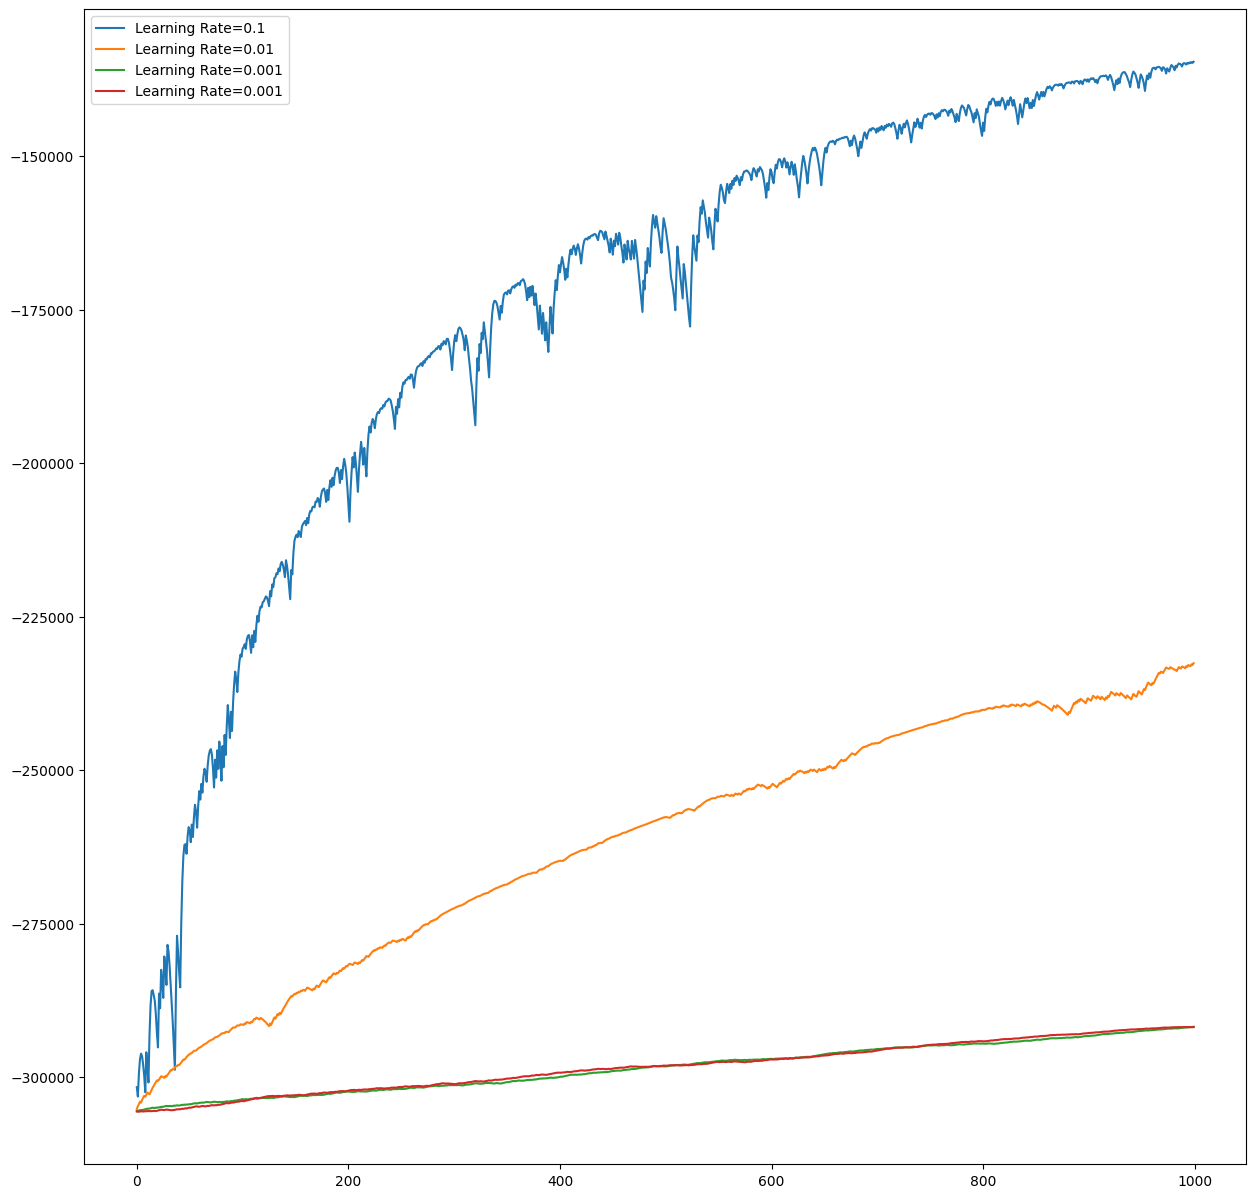

In [50]:
learning_rate=[0.1,0.01,0.001,0.001]
epochs=1000

plt.figure(figsize=(15,15))

# train model for each learning rate and plot log-likelihood with batch gradient descent
for i in learning_rate:
  _,log_likelihood_history=bgd(x_train,y_train,i,epochs,32)
  plt.plot(log_likelihood_history,label=f'Learning Rate={i}')
plt.legend()
plt.show()

In [100]:
# training three different models sgd,gd,bgd with learning rate 0.01 and 1000 epochs
theta_sgd,log_likelihood_history_sgd=sgd(x_train,y_train,0.01,1000)
theta_gd,log_likelihood_history_gd=gd(x_train,y_train,0.01,1000)
theta_bgd,log_likelihood_history_bgd=bgd(x_train,y_train,0.01,1000)

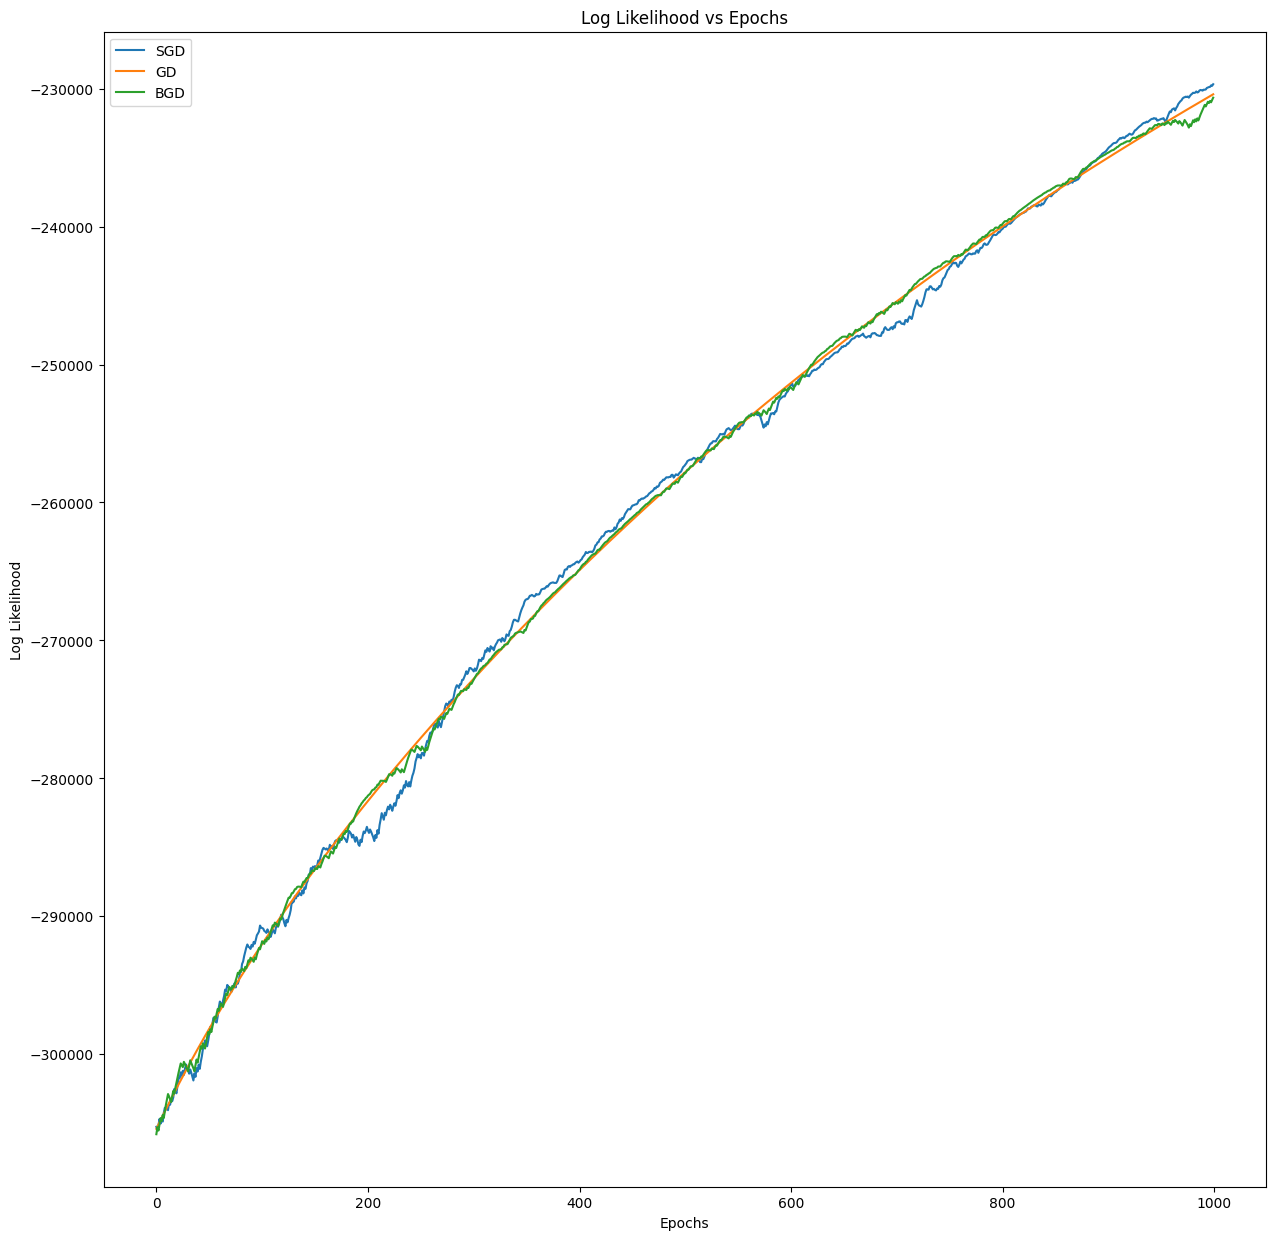

In [101]:
# plotting log-likelihood history for each gradient descent method
plt.figure(figsize=(15,15))
plt.plot(log_likelihood_history_sgd,label='SGD')
plt.plot(log_likelihood_history_gd,label='GD')
plt.plot(log_likelihood_history_bgd,label='BGD')
plt.title('Log Likelihood vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Log Likelihood')
plt.legend()

# Task 4: **Testing**

For this task, Test the final 3 versions with Test File given in the dataset. Report all the metrics that are used for a classification problem with all the possible visualization plots.

In [102]:
# split test data into features and target
x_test=df_test.drop('Churn',axis=1)
y_test=df_test['Churn']

In [103]:
# function to make predictions using logistic regression
def predict(x, theta, threshold=0.5):
    z = np.dot(x, theta)  # compute linear combination
    y_pred = sigmoid(z)   # apply sigmoid function
    return (y_pred >= threshold).astype(int)  # convert to binary output

In [104]:
# make predictions using trained models
y_test_pred_sgd=predict(x_test,theta_sgd)
y_test_pred_gd=predict(x_test,theta_gd)
y_test_pred_bgd=predict(x_test,theta_bgd)

In [132]:
# table to store results.
result_table=[]

In [133]:
# calculate evaluation metrics for stochastic gradient descent
accuracy1 = accuracy_score(y_test, y_test_pred_sgd)
precision1 = precision_score(y_test, y_test_pred_sgd)
recall1 = recall_score(y_test, y_test_pred_sgd)
f1_1 = f1_score(y_test, y_test_pred_sgd)

# Print evaluation metrics for stochastic gradient descent
print("Evaluation Metrics for stochastic gradient descent:")
print(f"Accuracy: {accuracy1:.4f}")
print(f"Precision: {precision1:.4f}")
print(f"Recall: {recall1:.4f}")
print(f"F1 Score: {f1_1:.4f}")

# add in result table
result_table.append(['SGD',accuracy1,precision1,recall1,f1_1])

Evaluation Metrics for stochastic gradient descent:
Accuracy: 0.5412
Precision: 0.5080
Recall: 0.9923
F1 Score: 0.6720


In [134]:
# calculate evaluation metrics for full batch gradient descent
accuracy2 = accuracy_score(y_test, y_test_pred_gd)
precision2 = precision_score(y_test, y_test_pred_gd)
recall2 = recall_score(y_test, y_test_pred_gd)
f1_2 = f1_score(y_test, y_test_pred_gd)

# print evaluation metrices for full batch gradient descent
print("Evaluation Metrics for full batch gradient descent:")
print(f"Accuracy: {accuracy2:.4f}")
print(f"Precision: {precision2:.4f}")
print(f"Recall: {recall2:.4f}")
print(f"F1 Score: {f1_2:.4f}")

# add in result table
result_table.append(['GD',accuracy2,precision2,recall2,f1_2])

Evaluation Metrics for full batch gradient descent:
Accuracy: 0.5474
Precision: 0.5115
Recall: 0.9929
F1 Score: 0.6752


In [135]:
# calculate evaluation metrics for batch gradient descent
accuracy3 = accuracy_score(y_test, y_test_pred_bgd)
precision3 = precision_score(y_test, y_test_pred_bgd)
recall3 = recall_score(y_test, y_test_pred_bgd)
f1_3 = f1_score(y_test, y_test_pred_bgd)

# print evaluation metrices for batch gradient descent
print("Evaluation Metrics for batch gradient descent:")
print(f"Accuracy: {accuracy3:.4f}")
print(f"Precision: {precision3:.4f}")
print(f"Recall: {recall3:.4f}")
print(f"F1 Score: {f1_3:.4f}")

# add in result table
result_table.append(['BGD',accuracy3,precision3,recall3,f1_3])

Evaluation Metrics for batch gradient descent:
Accuracy: 0.5807
Precision: 0.5313
Recall: 0.9764
F1 Score: 0.6881


In [136]:
result_table=pd.DataFrame(result_table,columns=['Gradient descent','Accuracy','Precision','Recall','F1 score'])
result_table

,Gradient descent,Accuracy,Precision,Recall,F1 score
0,SGD,0.541150,0.508017,0.992293,0.671997
1,GD,0.547426,0.511479,0.992884,0.675156
2,BGD,0.580747,0.531262,0.976388,0.688115


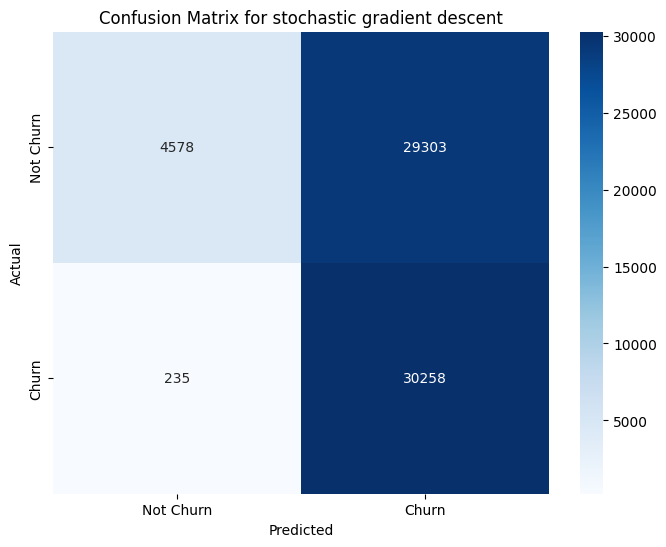

In [108]:
# compute confusion matrix for sgd predictions
conf_matrix1 = confusion_matrix(y_test, y_test_pred_sgd)
plt.figure(figsize=(8, 6))
# plot heatmap of confusion matrix for sgd
sns.heatmap(conf_matrix1, annot=True,fmt='d', cmap='Blues',xticklabels=['Not Churn', 'Churn'],yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for stochastic gradient descent')
plt.show()


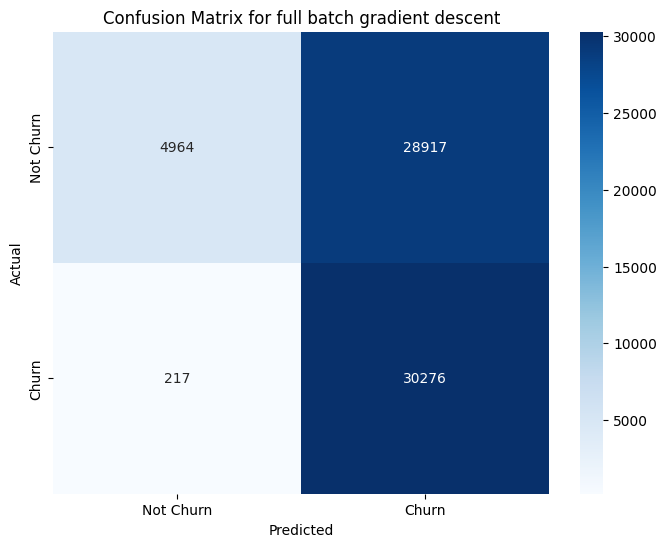

In [109]:
# compute confusion matrix for gd predictions
conf_matrix2 = confusion_matrix(y_test, y_test_pred_gd)
plt.figure(figsize=(8, 6))
# plot heatmap of confusion matrix for gd
sns.heatmap(conf_matrix2, annot=True,fmt='d', cmap='Blues',xticklabels=['Not Churn', 'Churn'],yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for full batch gradient descent')
plt.show()


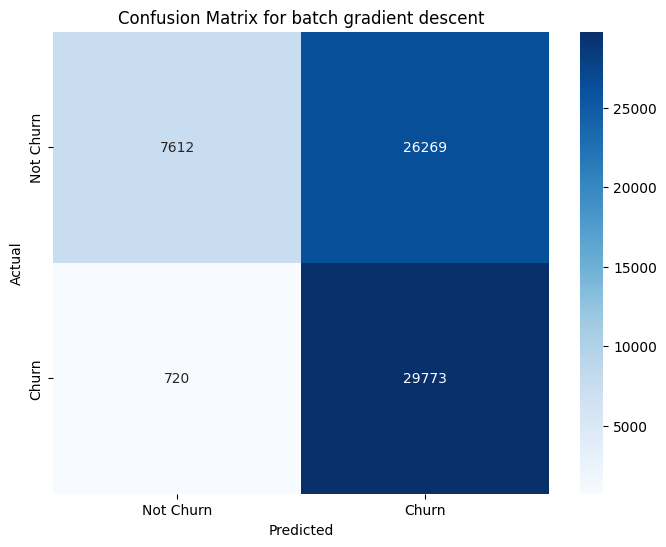

In [110]:
# compute confusion matrix for bgd predictions
conf_matrix3 = confusion_matrix(y_test, y_test_pred_bgd)
plt.figure(figsize=(8, 6))
# plot heatmap of confusion matrix for bgd
sns.heatmap(conf_matrix3, annot=True,fmt='d', cmap='Blues',xticklabels=['Not Churn', 'Churn'],yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for batch gradient descent')
plt.show()


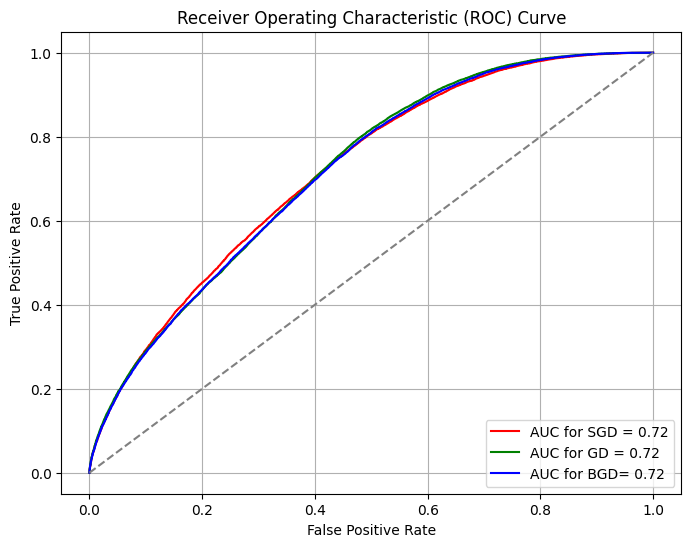

In [111]:
# Compute ROC curve and AUC
fpr_sgd, tpr_sgd, _ = roc_curve(y_test, np.dot(x_test,theta_sgd))
roc_auc_sgd = auc(fpr_sgd, tpr_sgd)

fpr_gd, tpr_gd, _ = roc_curve(y_test, np.dot(x_test,theta_gd))
roc_auc_gd = auc(fpr_gd, tpr_gd)

fpr_bgd, tpr_bgd, _ = roc_curve(y_test, np.dot(x_test,theta_bgd))
roc_auc_bgd = auc(fpr_bgd, tpr_bgd)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_sgd, tpr_sgd, color="red", label=f"AUC for SGD = {roc_auc_sgd:.2f}")
plt.plot(fpr_gd, tpr_gd, color="green", label=f"AUC for GD = {roc_auc_gd:.2f}")
plt.plot(fpr_bgd, tpr_bgd, color="blue", label=f"AUC for BGD= {roc_auc_bgd:.2f}")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


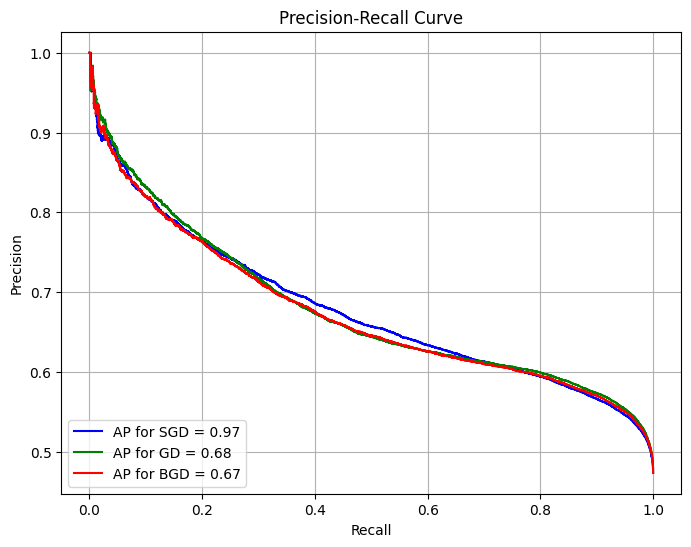

In [112]:
# compute precion recall curve
precision_sgd, recall_sgd, _ = precision_recall_curve(y_test, np.dot(x_test,theta_sgd))
avg_precision_sgd = average_precision_score(y_test, np.dot(x_test,theta_sgd))

precision_gd, recall_gd, _ = precision_recall_curve(y_test, np.dot(x_test,theta_gd))
avg_precision_gd = average_precision_score(y_test, np.dot(x_test,theta_gd))

precision_bgd, recall_bgd, _ = precision_recall_curve(y_test, np.dot(x_test,theta_bgd))
avg_precision_bgd = average_precision_score(y_test, np.dot(x_test,theta_bgd))

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_sgd, precision_sgd, color="blue", label=f"AP for SGD = {avg_precision:.2f}")
plt.plot(recall_gd, precision_gd, color="green",label=f"AP for GD = {avg_precision_gd:.2f}")
plt.plot(recall_bgd, precision_bgd, color="red", label=f"AP for BGD = {avg_precision_bgd:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid()
plt.show()


#**NOTE**
**> Comments in Python code must be present explaining the necessary variables, functions, and**

**> In your Report, content should present or each Task with your observations and a final conclusion**

**> The Report should be made in latex and Tex files should be submitted too**